In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [91]:
def thermalization(L, window):
    rhos = pd.read_csv('therm/is_trivial' + str(L) + 'by' + str(L) + '.dat', header=None, skiprows=1).to_numpy()
    print(str(L) + " by " + str(L) + ": " + str(np.shape(rhos)[0]) + " runs, each of " + str(np.shape(rhos)[1]-1) + " steps")
    rho_bar = np.average(rhos, axis=0)
    late_avg = 0
    # late_avg = np.average(rho_bar[10:])
    plt.plot(rho_bar-late_avg)
    plt.xlim((0,window))
    plt.show()

def autocorrelation(L, thermalization_time, window):
    rhos = pd.read_csv('autoc/is_trivial' + str(L) + 'by' + str(L) + '.dat', header=None, skiprows=1).to_numpy()
    print(str(L) + " by " + str(L) + ": " + str(np.shape(rhos)[0]) + " runs, each of " + str(np.shape(rhos)[1]-1) + " steps")
    interval = np.shape(rhos)[1] - 1
    result = np.zeros(2*(interval-thermalization_time)+1)
    for rho in rhos:
        data = rho[thermalization_time:]
        x = data - np.mean(data)
        result += np.correlate(x, x, mode='full')
    plt.plot(result[interval-thermalization_time:]/len(rhos)/np.arange(1+interval-thermalization_time,0,-1))
    plt.xlim((0,window))
    plt.show()

4 by 4 system: thermalization time 10, autocorrelation time 20
4 by 4: 10000 runs, each of 100 steps


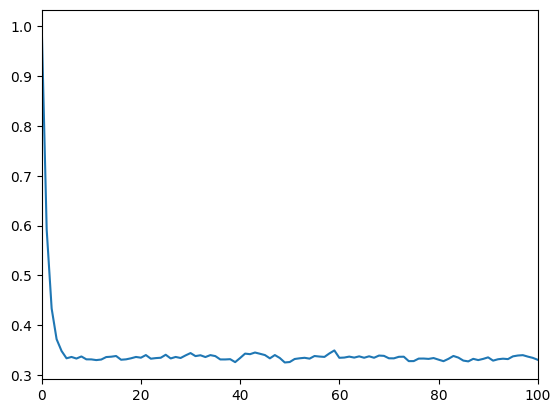

4 by 4: 100 runs, each of 1000 steps


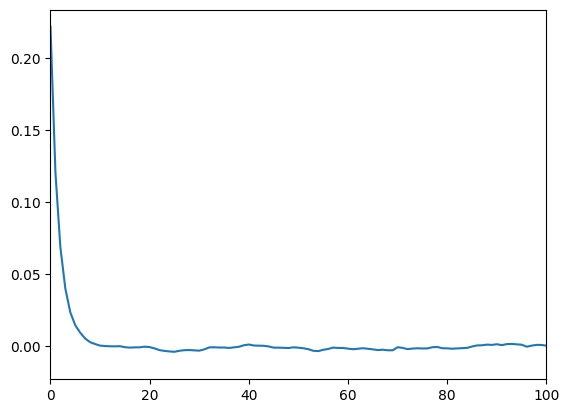

In [95]:
L = 4
print(str(L) + " by " + str(L) + " system: thermalization time 10, autocorrelation time 20")
thermalization(L, 100)
autocorrelation(L, 10, 100)

6 by 6 system: thermalization time 20, autocorrelation time 30
6 by 6: 10000 runs, each of 100 steps


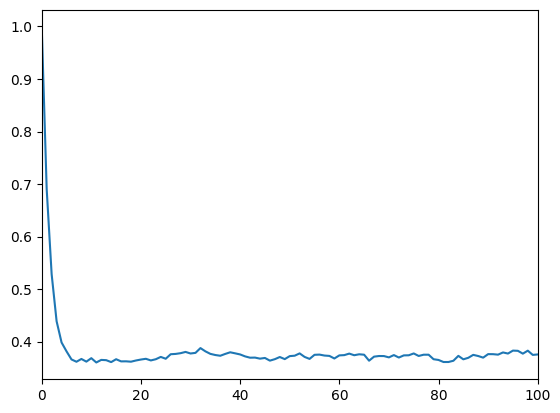

6 by 6: 100 runs, each of 1000 steps


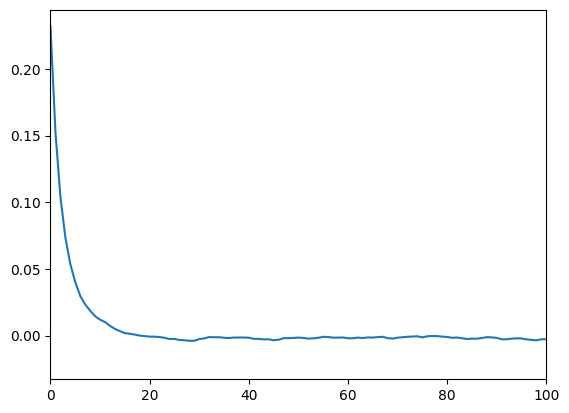

In [97]:
L = 6
print(str(L) + " by " + str(L) + " system: thermalization time 20, autocorrelation time 30")
thermalization(L, 100)
autocorrelation(L, 20, 100)

8 by 8 system: thermalization time 30, autocorrelation time 40
8 by 8: 10000 runs, each of 100 steps


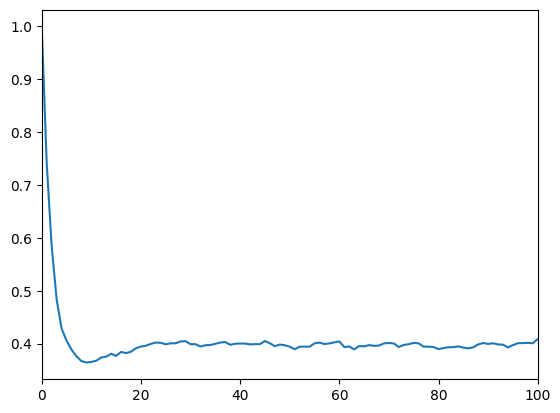

8 by 8: 100 runs, each of 1000 steps


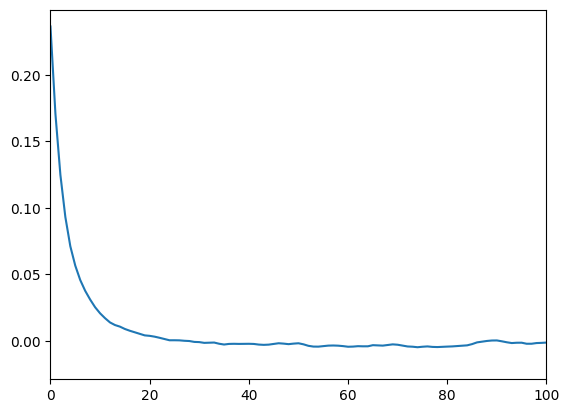

In [100]:
L = 8
print(str(L) + " by " + str(L) + " system: thermalization time 30, autocorrelation time 40")
thermalization(L, 100)
autocorrelation(L, 30, 100)

12 by 12 system: thermalization time 70, autocorrelation time 100
12 by 12: 10000 runs, each of 300 steps


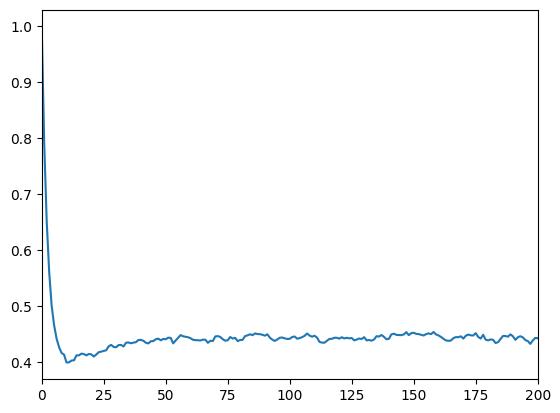

12 by 12: 100 runs, each of 1000 steps


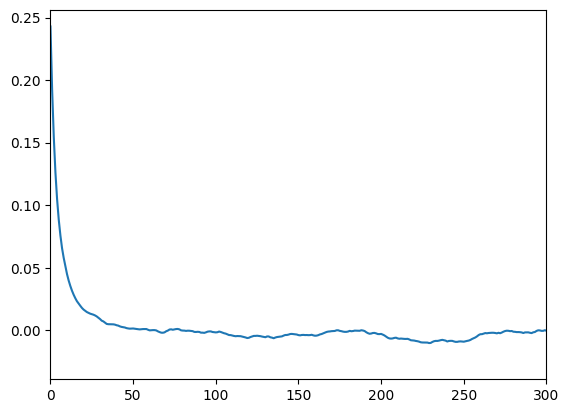

In [110]:
L = 12
print(str(L) + " by " + str(L) + " system: thermalization time 70, autocorrelation time 100")
thermalization(L, 200)
autocorrelation(L, 70, 300)

16 by 16 system: thermalization time 100, autocorrelation time 100
16 by 16: 10000 runs, each of 300 steps


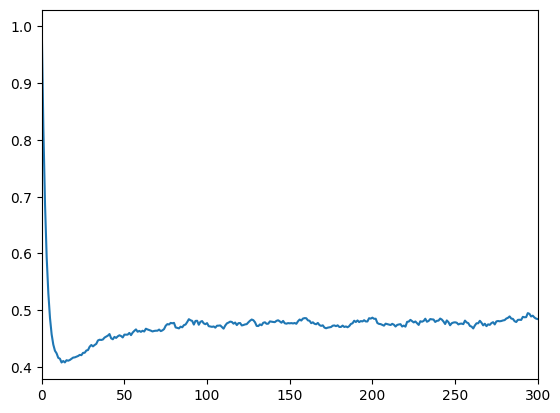

16 by 16: 100 runs, each of 1000 steps


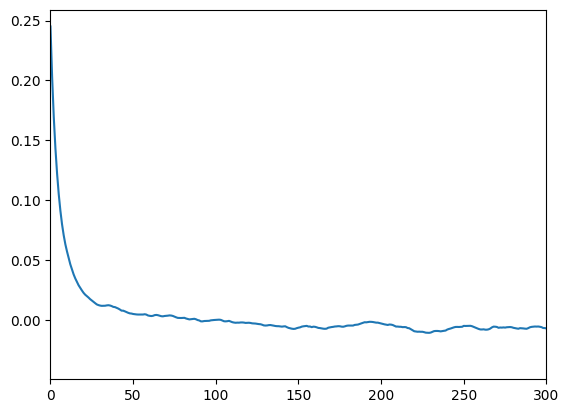

In [113]:
L = 16
print(str(L) + " by " + str(L) + " system: thermalization time 100, autocorrelation time 100")
thermalization(L, 300)
autocorrelation(L, 10, 300)

In [137]:
sizes = (4,6,8,12,16)
my_data = []
my_errors = []
for L in sizes:
    rhos = pd.read_csv('data/is_trivial' + str(L) + 'by' + str(L) + '.dat', header=None, skiprows=1).to_numpy()
    print(str(L) + " by " + str(L) + ": " + str(np.shape(rhos)[0]) + " runs, each of " + str(np.shape(rhos)[1]-1) + " steps")
    my_data.append(np.average(rhos[:,1:]))
    my_errors.append(np.std(rhos[:,1:])/(np.shape(rhos)[1]-1))

4 by 4: 1 runs, each of 10000 steps
6 by 6: 1 runs, each of 10000 steps
8 by 8: 1 runs, each of 10000 steps
12 by 12: 1 runs, each of 5000 steps
16 by 16: 1 runs, each of 2000 steps


In [40]:
ollie_sizes = (8, 12, 16, 24, 32, 40, 48)
ollie_data = (0.4014, 0.4478, 0.4826, 0.5336, 0.5754, 0.6079, 0.6334)

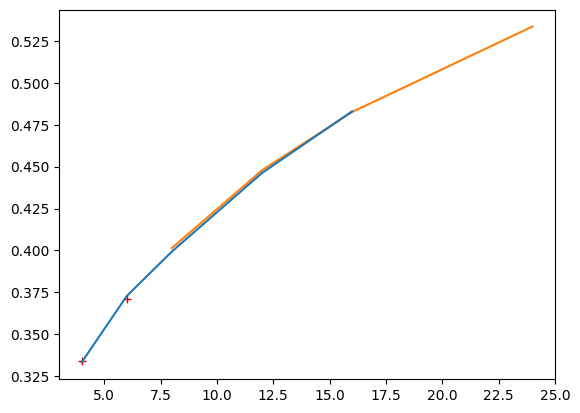

In [138]:
plt.errorbar(sizes, my_data, yerr=my_errors)
plt.plot(ollie_sizes[:4], ollie_data[:4])
plt.plot(4, 21759/65115, "r+")
plt.plot(6, 4201478043/11328279819, "r+")

In [124]:
my_data

[]

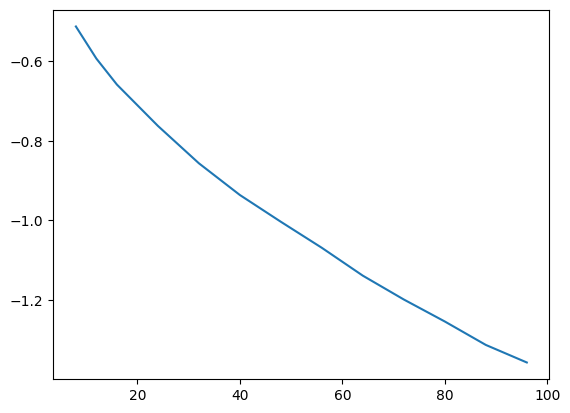

In [123]:
ollie_sizes = (8, 12, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96)
ollie_data = np.array((0.4014, 0.4478, 0.4826, 0.5336, 0.5754, 0.6079, 0.6334, 0.6566, 0.6798, 0.6984, 0.7146, 0.7309, 0.7425))
plt.plot(ollie_sizes, np.log(1-ollie_data))
plt.show()